# Brain vs. Body Weight

In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

# Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

# Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_fwf('brain_body.txt')

# Data cleaning

In [3]:
df.shape

(62, 2)

In [4]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [5]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [6]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [7]:
df = df.drop_duplicates()
df.shape

(62, 2)

In [8]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [9]:
iqr = df['Brain'].quantile(0.75) - df['Brain'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['Brain'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['Brain'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 47.6025
Upper Threshold : 119.60625
Lower Threshold : -70.80375000000001


In [10]:
df['Brain'] = df['Brain'].clip(-70.80375000000001,119.60625)

In [11]:
iqr = df['Body'].quantile(0.75) - df['Body'].quantile(0.25)
print('IQR :',iqr)
upper_threshold = df['Body'].quantile(0.75) + (1.5 * iqr)
print('Upper Threshold :',upper_threshold)
lower_threshold = df['Body'].quantile(0.25) - (1.5 * iqr)
print('Lower Threshold :',lower_threshold)

IQR : 161.75
Upper Threshold : 408.625
Lower Threshold : -238.375


In [12]:
df['Body'] = df['Body'].clip(-238.375, 408.625)

In [13]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176476,104.676532
std,45.213842,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606250,408.625000


# EDA

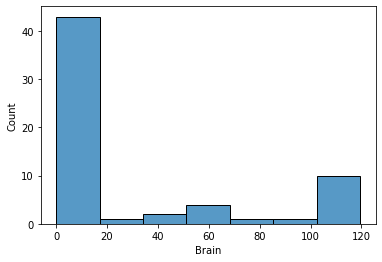

In [14]:
sns.histplot(df['Brain'])
plt.show()

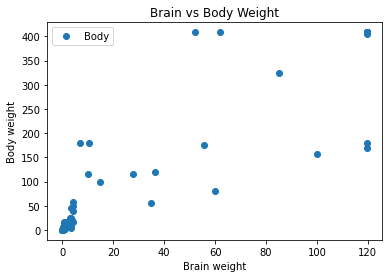

In [15]:
df.plot(x = 'Brain', y = 'Body', style = 'o')
plt.title('Brain vs Body Weight')
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.show()

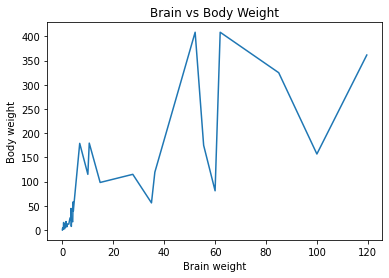

In [16]:
df.groupby('Brain')['Body'].mean().plot()
plt.title('Brain vs Body Weight')
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.show()

In [17]:
df.corr()

,Brain,Body
Brain,1.00000,0.88824
Body,0.88824,1.00000


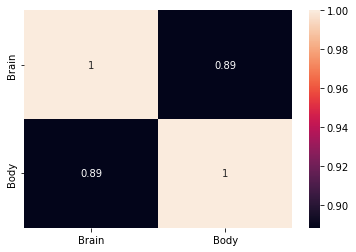

In [18]:
sns.heatmap(df.corr(), annot = True)
plt.show()

Since there is a strong positive correlation, we will proceed with linear regression model.

# Data preprocessing

In [19]:
X = df[['Brain']].values
y = df['Body'].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 555)

We have split the data into train and test for model training.


*   70% for training
*   30% for testing



In [21]:
X_train.shape, X_test.shape

((43, 1), (19, 1))

# Model training

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
print(regressor.intercept_)  # c
print(regressor.coef_)       # m

26.06760810761223
[2.80194652]


In [24]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = 2.8019 * x + 26.0676


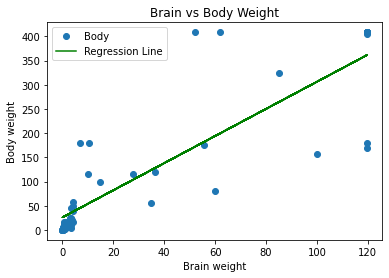

In [25]:
df.plot(x = 'Brain', y = 'Body', style = 'o')
plt.plot(X, regressor.predict(X), color='green', label = 'Regression Line')
plt.title('Brain vs Body Weight')
plt.xlabel('Brain weight')
plt.ylabel('Body weight')
plt.legend()
plt.show()

# Prediction

In [26]:
y_pred = regressor.predict(X_test)

In [27]:
compare = pd.DataFrame({'Actual_value' : y_test, 'Predicted_value' : y_pred})
compare

,Actual_value,Predicted_value
0,98.200,67.620475
1,17.000,37.415492
2,1.000,26.235725
3,6.400,27.258435
4,3.000,26.409446
5,2.400,27.608679
6,5.500,28.981632
7,325.000,264.233063
8,408.625,361.197924
9,12.300,28.169068


In [28]:
regressor.predict([[7.23]])

array([46.32568146])

# Evaluation of model

In [29]:
from sklearn import metrics
print('R2- SCORE :', regressor.score(X_test, y_test))

R2- SCORE : 0.9214344550487058


From this, we can see that the R2 - Score value is 0.92 which is very good.

So we can conclude saying that our model accuracy is 92% which means this is a very good model.